In [1]:
#Importing usual suspects
import pandas as pd # LIbrary to help load and explore data
import numpy as np # Library for mathematical functions and support for arrays and matrices

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
training_data = pd.read_csv("datasets/titanic/train.csv") # Load the training data into a dataframe
training_data.head(10) # show 10 line preview if brackets are falso just shows 5 as default

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
training_data.describe() # Show stats info about data - note only works for numerical value fields

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
training_data.info() #Information about the datatypes in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Sometimes we will have null values in data sets, let's find these and then work out what to do with them**

In [6]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**So age, cabin and embarked are null so we should do something with these**
1. **Age lets replace with average or median age**
2. **Cabin - not sure what to do here but rather than deleting or dropping column lets keep and replace with a dummy value**
3. **Embarked - very small amount of nulls so we could probably just take the most common entry**

**The above options are probably simple naive replacements but lets do it and see what happens**

**_Note that we need to do this to the test set too when we load that - we need to ensure that the test set resembles the training set_**

In [7]:
median_age_val = training_data["Age"].median() # show the median age
f"Median Age: {median_age_val}" 


'Median Age: 28.0'

In [8]:
mean_age_val = training_data["Age"].mean() # show the average age
f"Mean Age: {mean_age_val}" 

'Mean Age: 29.69911764705882'

**probably ok to pick either - lets go with mean**

In [9]:
training_data_age_cleaned = training_data["Age"].fillna(training_data["Age"].mean()) # Habit to create intermediate variables - you could use inplace=True as part of the inplace method params but I like to have original and intermediate variables just in case
# this is now the age column we will use later
training_data_age_cleaned.isna().sum() #same as isnull

0

**Looking at cabin we may think that where the cabin was located could have pssible correlated to the survival rate or somthing like that. Since we have no such information lets just replace it with dummy values**

In [10]:
training_data_cabin_cleaned = training_data["Cabin"].fillna('DUMMY') #Blanks is also fine

#Lets also do the embarked as the most embarked place
training_data_embarked_cleaned = training_data["Embarked"].fillna(training_data["Embarked"].mode()[0])
training_data_embarked_cleaned.isna().sum()

0

**Now we are going to combine the above for a clean training dataset**

In [11]:
#There are a few ways to do this but here we used filter
# Wont use passengerId, cabin, Name, ticket or embarked because its a reasonable bet to say this had no real bearing on their mortality
# Leaving out age as we will use the one from the cleaned set
clean_training_dataset = training_data.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'])
clean_training_dataset["Age"] = training_data_age_cleaned
clean_training_dataset["Embarked"] = training_data_embarked_cleaned

clean_training_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,male,1,0,7.2500,22.0,S
1,1,1,female,1,0,71.2833,38.0,C
2,1,3,female,0,0,7.9250,26.0,S
3,1,1,female,1,0,53.1000,35.0,S
4,0,3,male,0,0,8.0500,35.0,S


<AxesSubplot:ylabel='Survived'>

<AxesSubplot:ylabel='Pclass'>

<AxesSubplot:ylabel='Sex'>

<AxesSubplot:ylabel='SibSp'>

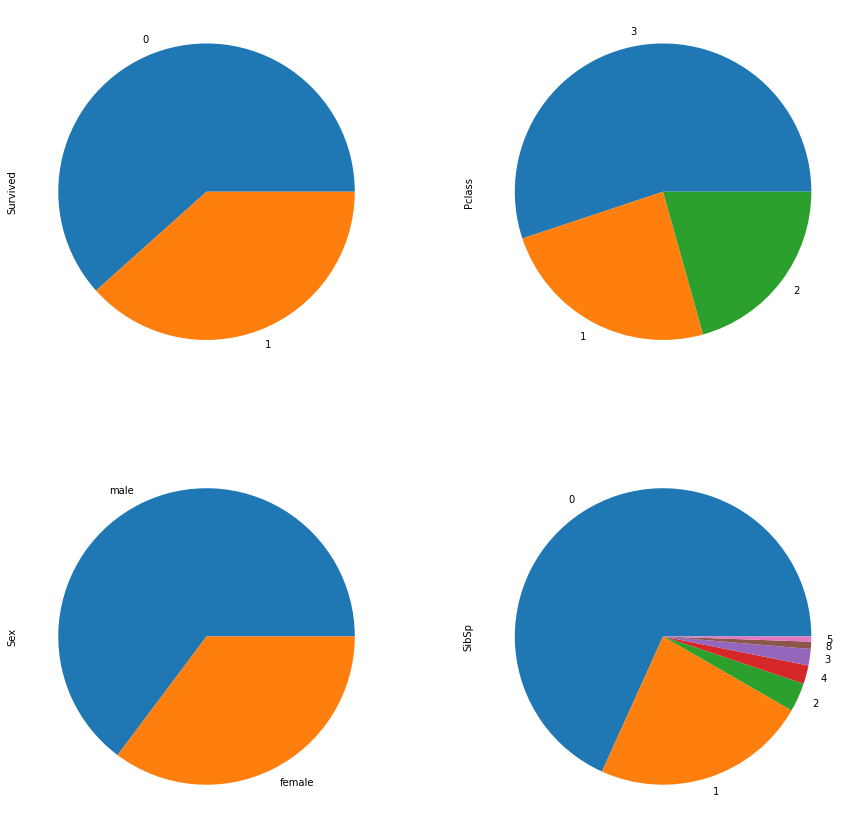

In [12]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(2, 2, figsize=(15,15)) #Create a figure of nrows and ncols


survived_df = clean_training_dataset["Survived"]
survived_df.value_counts().plot(kind="pie", ax=ax1[0,0])

class_df = clean_training_dataset["Pclass"]
class_df.value_counts().plot(kind="pie", ax=ax1[0,1])

gender_df = clean_training_dataset["Sex"]
gender_df.value_counts().plot(kind="pie", ax=ax1[1,0])


sibsp_df = clean_training_dataset["SibSp"]
sibsp_df.value_counts().plot(kind="pie", ax=ax1[1,1])



<AxesSubplot:xlabel='Survived', ylabel='count'>

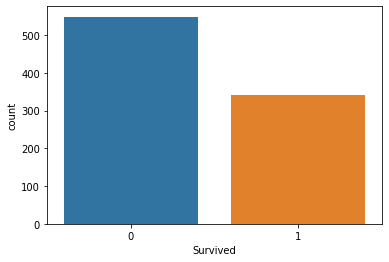

In [13]:
import seaborn as sns

sns.countplot(x="Survived", data=clean_training_dataset)


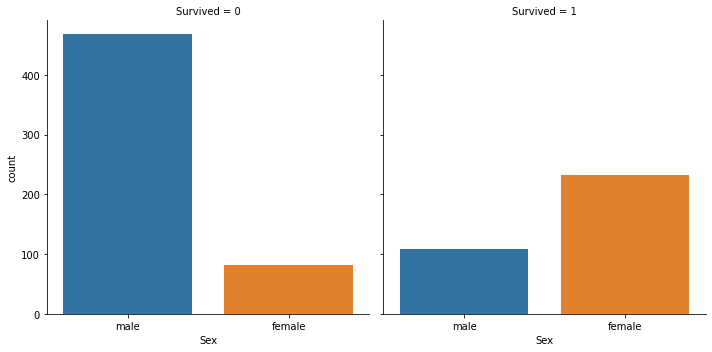

In [14]:
sns.catplot(x="Sex", col="Survived", kind="count", data=clean_training_dataset)

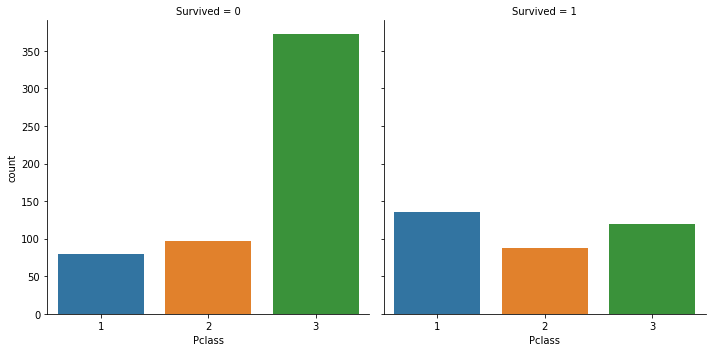

In [15]:
sns.catplot(x="Pclass", col="Survived", kind="count", data=clean_training_dataset)

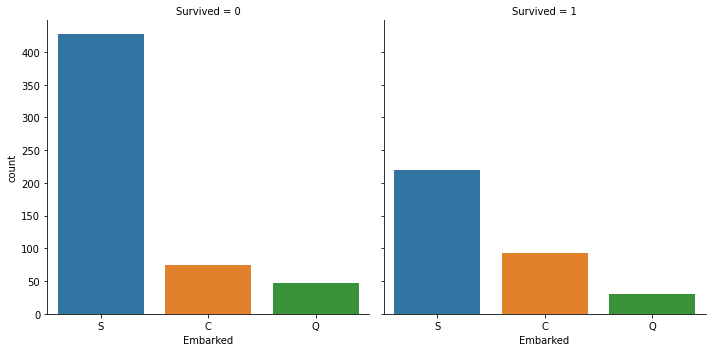

In [16]:
sns.catplot(x="Embarked", col="Survived", kind="count", data=clean_training_dataset)

In [17]:
clean_training_dataset["Age"].max()
clean_training_dataset["Age"].min()
clean_training_dataset["Age"].mean()

80.0

0.42

29.69911764705882

In [18]:
def put_in_age_bucket(age):
    
    if 0.0 <= age <= 19.99:
        return 0
    if 20.0 <= age <= 39.99:
        return 1
    if 40.0 <= age <= 59.00:
        return 2
    if 60.0 <= age <= 80.00:
        return 3


def create_age_buckets(age_df):
    age_bucket_df = age_df.apply(lambda row: put_in_age_bucket(row))
    return age_bucket_df


clean_training_dataset["Age_Bucket"] = create_age_buckets(clean_training_dataset["Age"]) 
clean_training_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Age_Bucket
0,0,3,male,1,0,7.2500,22.0,S,1
1,1,1,female,1,0,71.2833,38.0,C,1
2,1,3,female,0,0,7.9250,26.0,S,1
3,1,1,female,1,0,53.1000,35.0,S,1
4,0,3,male,0,0,8.0500,35.0,S,1


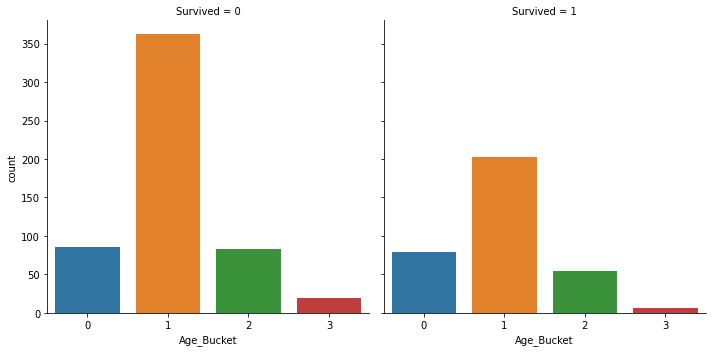

In [19]:
sns.catplot(x="Age_Bucket", col="Survived", kind="count", data=clean_training_dataset)

In [20]:
clean_training_dataset["Fare"].max()
clean_training_dataset["Fare"].min()
clean_training_dataset["Fare"].mean()


512.3292

0.0

32.204207968574636

In [21]:
clean_training_dataset["Fare_Band"] = pd.qcut(clean_training_dataset['Fare'], 4, labels=[1,2,3,4])
clean_training_dataset.head()

clean_training_dataset["Fare_Band"].value_counts()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Age_Bucket,Fare_Band
0,0,3,male,1,0,7.2500,22.0,S,1,1
1,1,1,female,1,0,71.2833,38.0,C,1,4
2,1,3,female,0,0,7.9250,26.0,S,1,2
3,1,1,female,1,0,53.1000,35.0,S,1,4
4,0,3,male,0,0,8.0500,35.0,S,1,2


2    224
1    223
4    222
3    222
Name: Fare_Band, dtype: int64

In [22]:
clean_training_dataset["Sex"] = clean_training_dataset["Sex"].map({"male":0, "female":1})
clean_training_dataset["Embarked"] = clean_training_dataset["Embarked"].map({"S":0, "C":1, "Q":2})

clean_training_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Age_Bucket,Fare_Band
0,0,3,0,1,0,7.2500,22.0,0,1,1
1,1,1,1,1,0,71.2833,38.0,1,1,4
2,1,3,1,0,0,7.9250,26.0,0,1,2
3,1,1,1,1,0,53.1000,35.0,0,1,4
4,0,3,0,0,0,8.0500,35.0,0,1,2


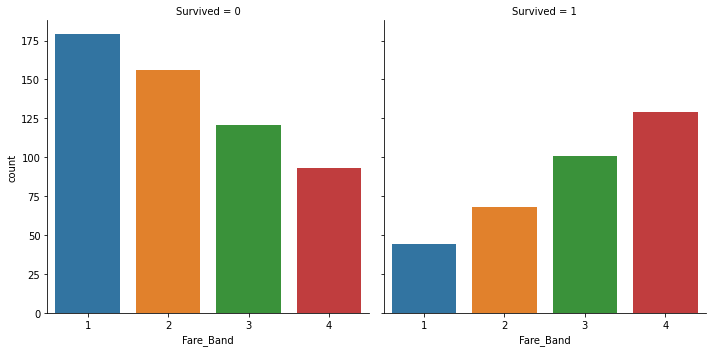

In [23]:
sns.catplot(x="Fare_Band", col="Survived", kind="count", data=clean_training_dataset)

In [24]:
clean_training_dataset = clean_training_dataset.drop(["Age"], axis = 1)

clean_training_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Bucket,Fare_Band
0,0,3,0,1,0,7.2500,0,1,1
1,1,1,1,1,0,71.2833,1,1,4
2,1,3,1,0,0,7.9250,0,1,2
3,1,1,1,1,0,53.1000,0,1,4
4,0,3,0,0,0,8.0500,0,1,2


In [25]:
clean_training_dataset = clean_training_dataset.drop(["Fare"], axis = 1)


In [26]:
clean_training_dataset.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Bucket,Fare_Band
0,0,3,0,1,0,0,1,1
1,1,1,1,1,0,1,1,4
2,1,3,1,0,0,0,1,2
3,1,1,1,1,0,0,1,4
4,0,3,0,0,0,0,1,2


In [41]:
unseen_data_df = pd.read_csv("datasets/titanic/test.csv")


In [42]:
clean_unseen_df = unseen_data_df.filter(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked'])

clean_unseen_df["Age_Bucket"] = create_age_buckets(clean_unseen_df["Age"]) 


In [43]:
clean_unseen_df["Sex"] = clean_unseen_df["Sex"].map({"male":0, "female":1})


In [44]:

clean_unseen_df["Embarked"] = clean_unseen_df["Embarked"].map({"S":0, "C":1, "Q":2})


,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Age_Bucket
0,3,0,0,0,7.8292,34.5,2,1.0
1,3,1,1,0,7.0000,47.0,0,2.0
2,2,0,0,0,9.6875,62.0,2,3.0
3,3,0,0,0,8.6625,27.0,0,1.0
4,3,1,1,1,12.2875,22.0,0,1.0


In [46]:
clean_unseen_df["Fare_Band"] = pd.qcut(clean_unseen_df['Fare'], 4, labels=[1,2,3,4])
clean_unseen_df.head()

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Age_Bucket,Fare_Band
0,3,0,0,0,7.8292,34.5,2,1.0,1
1,3,1,1,0,7.0000,47.0,0,2.0,1
2,2,0,0,0,9.6875,62.0,2,3.0,2
3,3,0,0,0,8.6625,27.0,0,1.0,2
4,3,1,1,1,12.2875,22.0,0,1.0,2
